In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw, rdFMCS

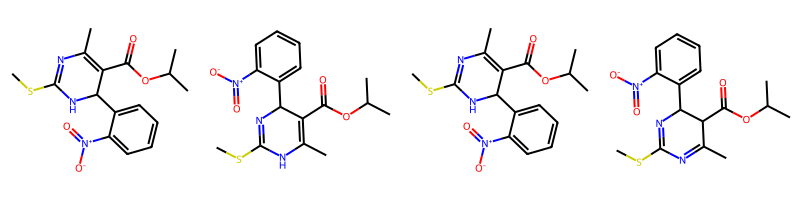

In [7]:
smls_ok = [
    "CSC1=NC(C)=C(C(=O)OC(C)C)C(c2ccccc2[N+](=O)[O-])N1",
    "CSC1=NC(c2ccccc2[N+](=O)[O-])C(C(=O)OC(C)C)=C(C)N1",
    "CSC1=NC(C)=C(C(=O)OC(C)C)C(c2ccccc2[N+](=O)[O-])N1",
]
mols_ok = [Chem.MolFromSmiles(sml) for sml in smls_ok]

smls_problem = ['CSC1=NC(c2ccccc2[N+](=O)[O-])C(C(=O)OC(C)C)C(C)=N1']
smls = smls_ok + smls_problem
mols = [Chem.MolFromSmiles(sml) for sml in smls]
Draw.MolsToGridImage(mols, molsPerRow=4)

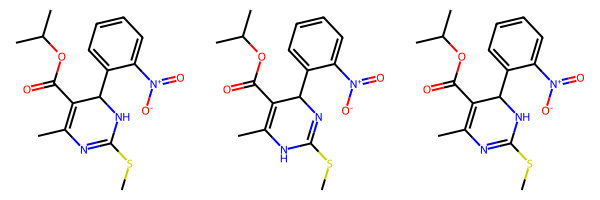

In [4]:
# Align and display the set of molecules that looks OK
mcs_ok = rdFMCS.FindMCS(mols_ok)
mcs_smarts_ok = mcs_ok.smartsString
mcs_mol_ok = Chem.MolFromSmarts(mcs_smarts_ok)
Chem.Compute2DCoords(mcs_mol_ok)

for m in mols_ok:
     _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol_ok)
Draw.MolsToGridImage(mols_ok)

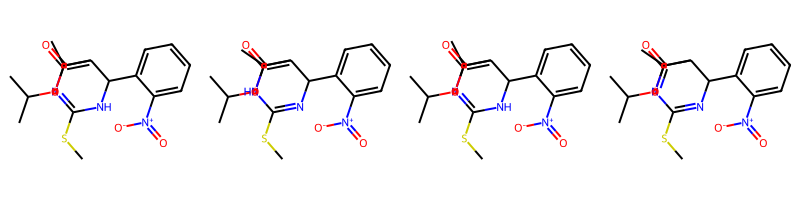

In [15]:
# Align and display the full set of molecules
mcs = rdFMCS.FindMCS(mols)
mcs_smarts = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)
Chem.Compute2DCoords(mcs_mol)

for m in mols:
     _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True)

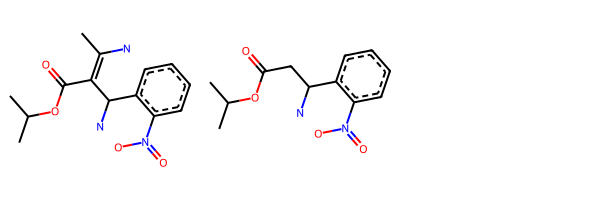

In [6]:
# Align the two mcs and display
mcs_mols = [mcs_mol_ok, mcs_mol]
mcs_mcs = rdFMCS.FindMCS(mcs_mols)
mcs_mcs_smarts = mcs_mcs.smartsString
mcs_mcs_mol = Chem.MolFromSmarts(mcs_mcs_smarts)
Chem.Compute2DCoords(mcs_mcs_mol)

for m in mcs_mols:
     _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mcs_mol)
Draw.MolsToGridImage(mcs_mols)